## New Start for my Sanity

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from random import randint

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)
df.columns

Index(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos', 'result'],
      dtype='object')

In [3]:
test_size = 0.3

# Attempting to visualize data
i think y3ny 

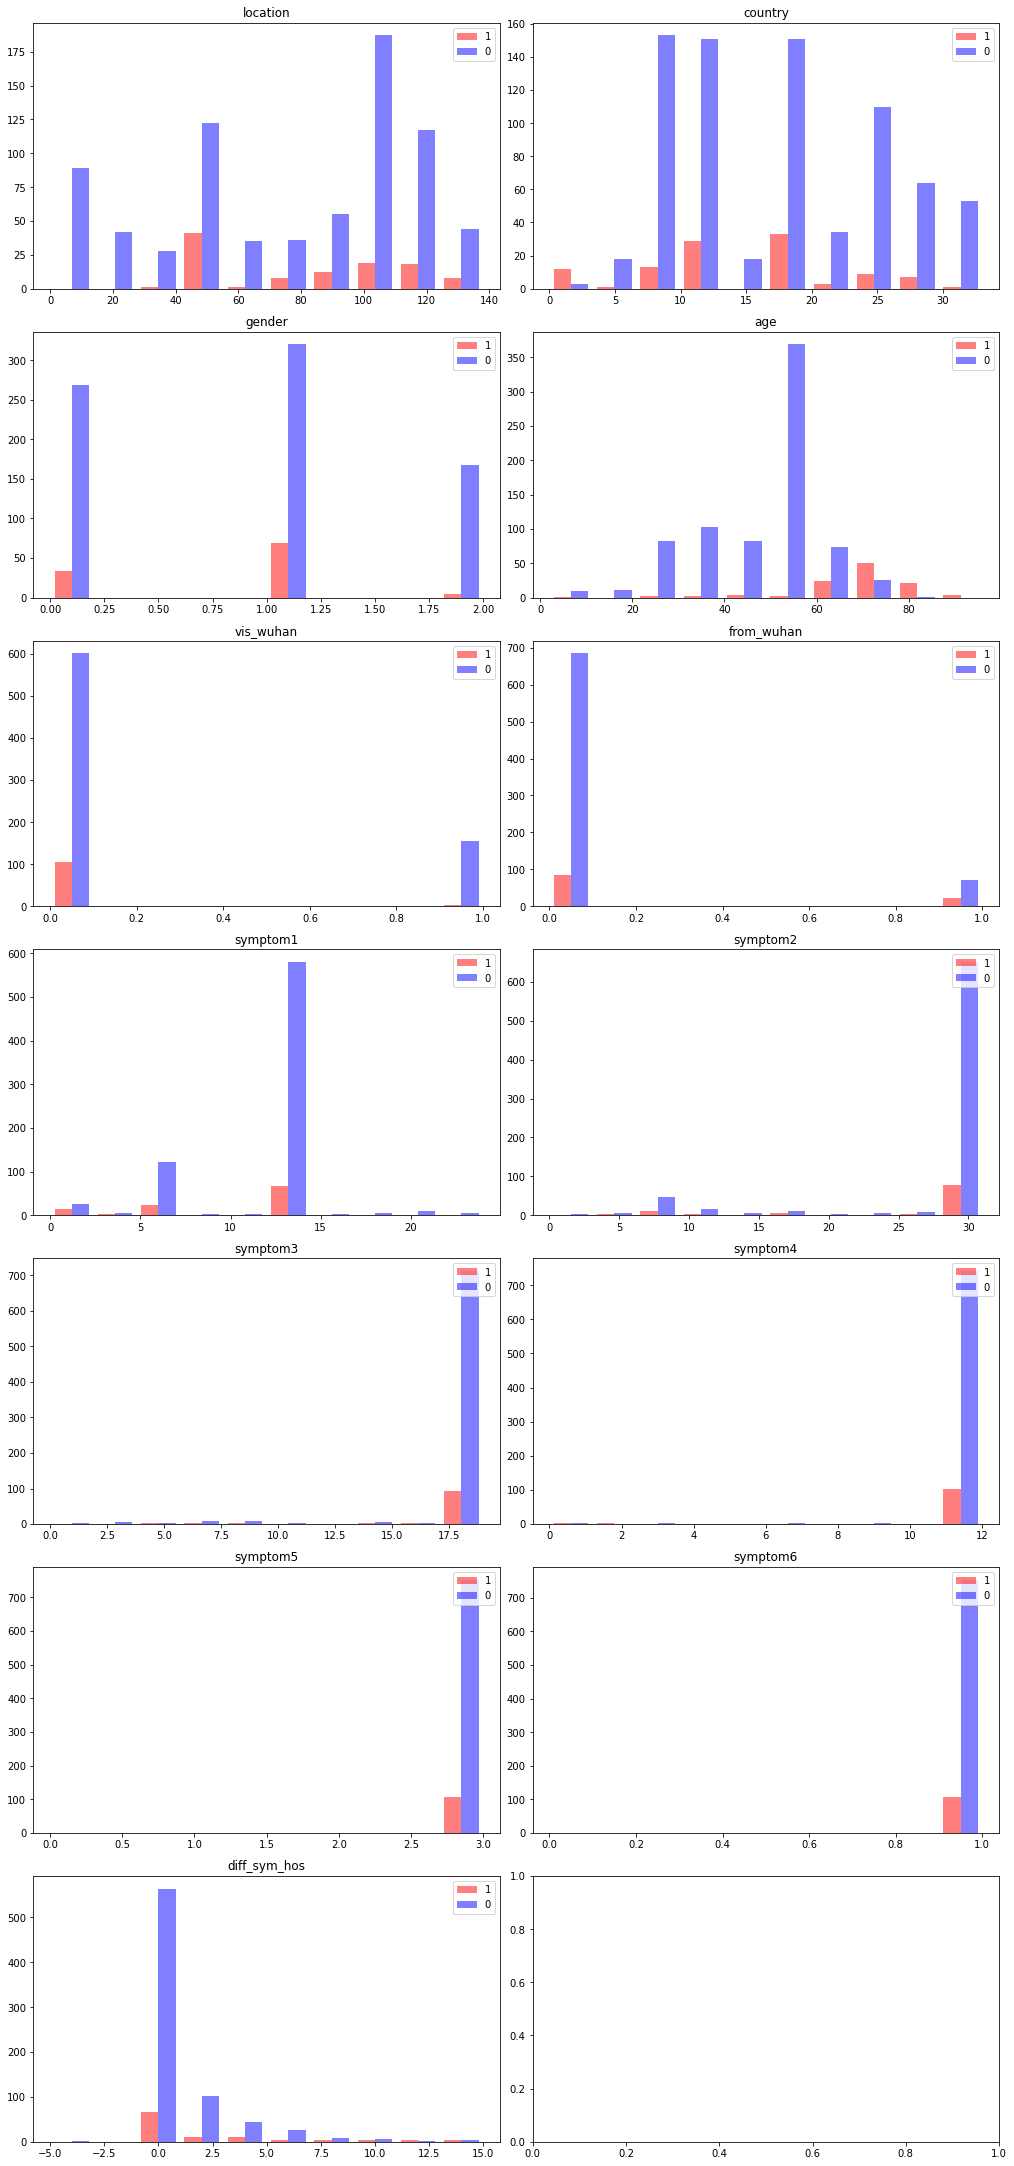

In [4]:
def sephist(col):
    ones = df[df['result'] == 1][col]
    zeros = df[df['result'] == 0][col]
    return ones, zeros

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(14, 30))
for i in range(13):
    ax[i // 2][i % 2].hist(sephist(df.columns[i]), alpha=0.5, label=[1, 0], color=['r', 'b'])
    ax[i // 2][i % 2].legend(loc='upper right')
    ax[i // 2][i % 2].set_title(df.columns[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [5]:
for i in range(len(df)):
    df.iloc[i, 12] = df.iloc[i,12]*-1 if df.iloc[i, 12] < 0 else df.iloc[i, 12]
df['gender'] = df['gender'].mask(df['gender'] == 2, 1)

In [6]:
columns = ['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'location', 'country']
df_new = df.copy()

# Training and tuning

In [7]:
x = df_new.drop('result', axis=1)
y = df_new['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size,shuffle=True, random_state=42)

In [8]:
gnb = GaussianNB()

In [9]:
parameters = [
    {'var_smoothing':np.logspace(0,-10, num=100)}
]
grid_search = GridSearchCV(gnb, parameters, scoring='recall', cv=5)
best_gnb = grid_search.fit(X_train, y_train)
best_gnb.fit(X_train, y_train)
y_predict = best_gnb.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
precision= precision_score(y_test, y_predict,average=None)
recall = recall_score(y_test,y_predict,average=None)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = f1_score(y_test, y_predict)
print(best_gnb.best_estimator_)

accuracy, precision, recall, F1, roc_auc

GaussianNB(var_smoothing=4.132012400115335e-09)


(0.7297297297297297,
 array([0.98159509, 0.30208333]),
 array([0.70484581, 0.90625   ]),
 0.453125,
 0.8055479074889866)

# Feature importance

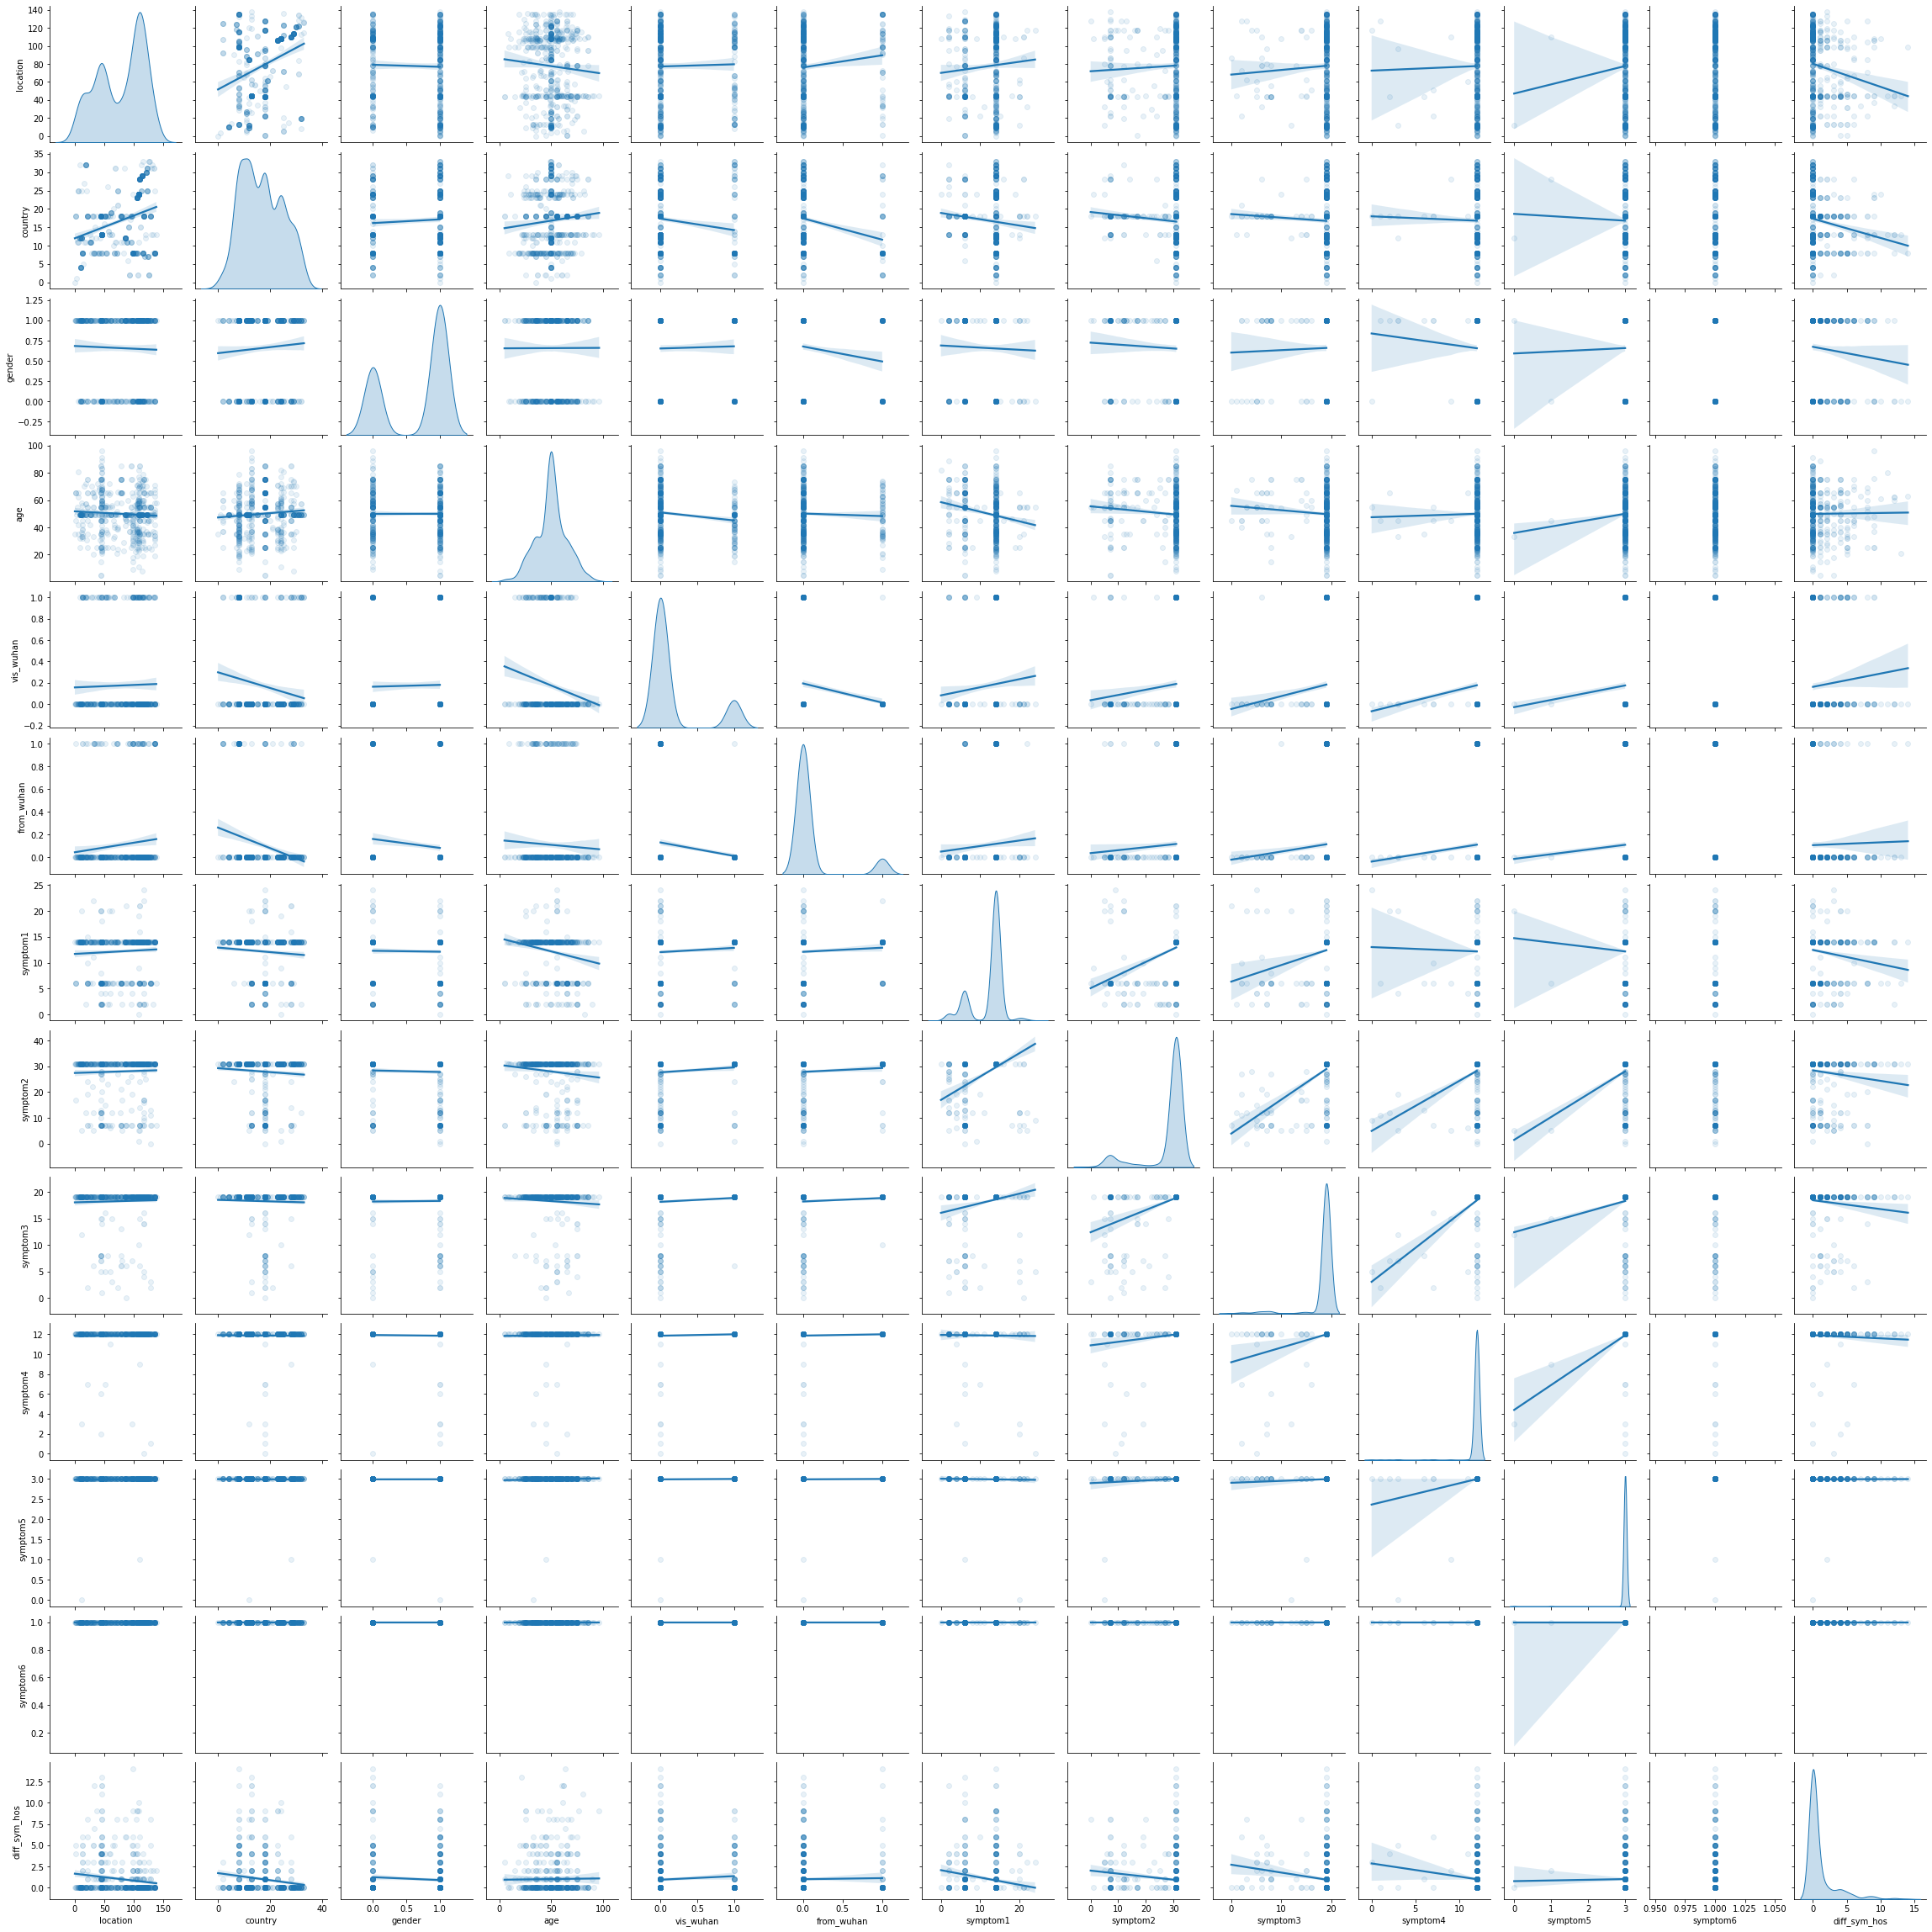

In [10]:
train_dataset = X_train.copy()
train_dataset.insert(0, "resu", y_train)
_ = sns.pairplot(
    X_train,
    kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})

In [11]:
def plot_importantes_features(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

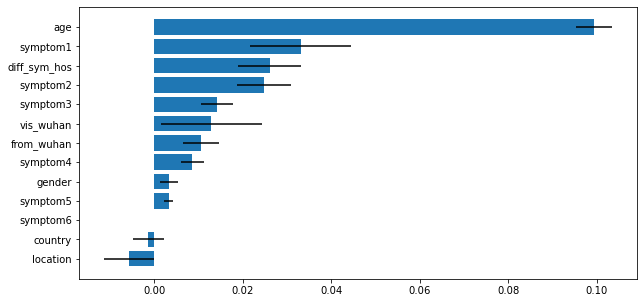

In [12]:
imps = permutation_importance(best_gnb.best_estimator_, X_train, y_train)
def plot_importantes_features(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots(figsize=(10, 5))
    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

plot_importantes_features(imps, X_train.columns)

In [19]:
from sklearn.ensemble import BaggingClassifier


gnb_bagging = GaussianNB()
bagging_classifier = BaggingClassifier(gnb_bagging, random_state=42, max_samples=1.0)
# bagging_classifier.fit(X_train, y_train)

parameters = {
    'base_estimator__var_smoothing':np.logspace(0,-9, num=100),
    'max_features': np.arange(2, 13, 1),
#     'max_samples': np.arange(0.1, 1.1, 0.1),
}
grid_search = GridSearchCV(bagging_classifier, parameters, scoring='f1', cv=5)
best_gnb = grid_search.fit(X_train, y_train)
best_gnb.fit(X_train, y_train)
y_predict = best_gnb.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
precision= precision_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = f1_score(y_test, y_predict)
print(best_gnb.best_estimator_)

accuracy, precision, recall, F1, roc_auc

dict_keys(['priors', 'var_smoothing'])
BaggingClassifier(base_estimator=GaussianNB(var_smoothing=3.511191734215127e-05),
                  max_features=10, random_state=42)


(0.8803088803088803,
 0.5128205128205128,
 0.625,
 0.5633802816901409,
 0.7706497797356828)

In [ ]:
bagging_classifier.random_state

# habd RFE

In [ ]:
gnb_rfe = GaussianNB()
selector = RFE(gnb_rfe, n_features_to_select=8, step=1)
selector.fit(X_train, y_train)
selector.support_

# habd
## Trying to drop features and get better accuracy

In [22]:
# # columns = ['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'location', 'country']
columns = ['symptom2', 'symptom3', 'symptom6']
df_habd = df.copy()
for i in columns:
     df_habd.drop(i, axis=1, inplace=True)
df_habd


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom4,symptom5,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,12,3,8,1
1,101,8,0,56.0,0,1,14,12,3,0,0
2,137,8,1,46.0,0,1,14,12,3,13,0
3,116,8,0,60.0,1,0,14,12,3,0,0
4,116,8,1,58.0,0,0,14,12,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,1,24.0,0,0,14,12,3,0,1
859,0,0,1,35.0,0,0,14,12,3,0,0
860,3,1,1,49.4,0,0,14,12,3,0,0
861,24,9,1,49.4,0,0,14,12,3,0,0


In [23]:
x = df_habd.drop('result', axis=1)
y = df_habd['result']
X_train_habd, X_test_habd, y_train_habd, y_test_habd = train_test_split(x, y, test_size=test_size,shuffle=True, random_state=42)

In [24]:
parameters = [
    {'var_smoothing':np.logspace(0,-10, num=100)}
]
grid_search_habd = GridSearchCV(gnb, parameters, scoring='recall', cv=5)
best_gnb_habd = grid_search_habd.fit(X_train_habd, y_train_habd)
best_gnb_habd.fit(X_train_habd, y_train_habd)
y_predict_habd = best_gnb_habd.predict(X_test_habd)
accuracy = accuracy_score(y_test_habd,y_predict_habd)
precision= precision_score(y_test_habd, y_predict_habd,average=None)
recall = recall_score(y_test_habd,y_predict_habd,average=None)
roc_auc = roc_auc_score(y_test_habd, y_predict_habd)
F1 = f1_score(y_test_habd, y_predict_habd)
print(best_gnb_habd.best_estimator_)
accuracy, precision, recall, F1, roc_auc

[[0.1, 0.9], [0.2, 0.8], [0.30000000000000004, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6000000000000001, 0.3999999999999999], [0.7000000000000001, 0.29999999999999993], [0.8, 0.19999999999999996], [0.9, 0.09999999999999998], [1.0, 0.0]]


/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

GaussianNB(priors=[0.1, 0.9], var_smoothing=1.0)


/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/home/mostafa/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/naive_bayes.py:488: RuntimeWar

(0.12355212355212356,
 array([0.        , 0.12355212]),
 array([0., 1.]),
 0.21993127147766325,
 0.5)

all features \
(0.7297297297297297,
 array([0.98159509, 0.30208333]),
 array([0.70484581, 0.90625   ]),
 0.453125,
 0.8055479074889866)
 
drop symptom6 \
(0.7297297297297297,
 array([0.98159509, 0.30208333]),
 array([0.70484581, 0.90625   ]),
 0.453125,
 0.8055479074889866) \
 
drop symptom6, location \
(0.7181467181467182, 
 array([0.98125   , 0.29292929]),
 array([0.69162996, 0.90625   ]),
 0.44274809160305345,
 0.7989399779735684) \
 
 drop symptom6, location, symptom5 \
 (0.8764478764478765,
 array([0.94520548, 0.5       ]),
 array([0.91189427, 0.625     ]),
 0.5555555555555556,
 0.7684471365638766)\
 
  drop symptom6, location, symptom5, from_wuhan \
(0.8687258687258688,
 array([0.93665158, 0.47368421]),
 array([0.91189427, 0.5625    ]),
 0.5142857142857142,
 0.7371971365638766)\
 
 drop symptom2 \
 (0.7451737451737451,
 array([0.98203593, 0.31521739]),
 array([0.72246696, 0.90625   ]),
 0.467741935483871,
 0.8143584801762115)
 
 drop symptom2, symptom3 \
(0.7451737451737451,
 array([0.98203593, 0.31521739]),
 array([0.72246696, 0.90625   ]),
 0.467741935483871,
 0.8143584801762115)\
 
  drop symptom2, symptom3 \
(0.7451737451737451,
 array([0.98203593, 0.31521739]),
 array([0.72246696, 0.90625   ]),
 0.467741935483871,
 0.8143584801762115)\
 
 drop symptom2, symptom3, location \ 
(0.722007722007722,
 array([0.98136646, 0.29591837]),
 array([0.69603524, 0.90625   ]),
 0.4461538461538461,
 0.8011426211453745)
 
 bagging without cv \
 (0.8455598455598455,
 array([0.97948718, 0.4375    ]),
 array([0.84140969, 0.875     ]),
 0.5833333333333334,
 0.858204845814978)\
 
 BaggingClassifier(base_estimator=GaussianNB(var_smoothing=3.511191734215127e-05),
                  max_features=0.7999999999999999, random_state=42)
 (0.8803088803088803,
 0.5128205128205128,
 0.625,
 0.5633802816901409,
 0.7706497797356828)
 
 (0.8803088803088803,
 0.5128205128205128,
 0.625,
 0.5633802816901409,
 0.7706497797356828)

no encoding gaussian
(array([0.98039216, 0.25      ]),
 array([0.64935065, 0.9       ]),
 0.391304347826087,
 0.7746753246753246)
 

encoding gaussian
(array([0.97368421, 0.18367347]),
 array([0.48051948, 0.9       ]),
 0.30508474576271183,
 0.6902597402597402)


In [ ]:
np.arange(0, 1.0,.1)